# LAB 4 - MỘT SỐ THUẬT TOÁN CƠ BẢN CỦA HỌC MÁY #

### 1. LINEAR REGERSSION ###

# BIẾT: HỒI QUY TUYẾN TÍNH LÀ DỰ ĐOÁN GIÁ TRỊ LIÊN TỤC DỰA TRÊN MỘT HOẶC NHIỀU BIẾN ĐỘC LẬP 

# Sử dụng hồi quy tuyến tính để dự đoán giá nhà thông qua bộ dữ liệu Boston housing 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


In [4]:
cali= fetch_california_housing()
x=pd.DataFrame(cali.data, columns=cali.feature_names)
y=pd.Series(cali.target)

In [5]:
# Chia cặp dữ liệu có 80% huấn luyện và 20% kiểm tra
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [23]:
# Xây dựng và huấn luyện mô hình
model= LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [24]:
# Dự đoán và đánh giá
y_pred=model.predict(x_test)
mse=mean_squared_error(y_test, y_pred)
r2=r2_score(y_test,y_pred)

<function matplotlib.pyplot.show(close=None, block=None)>

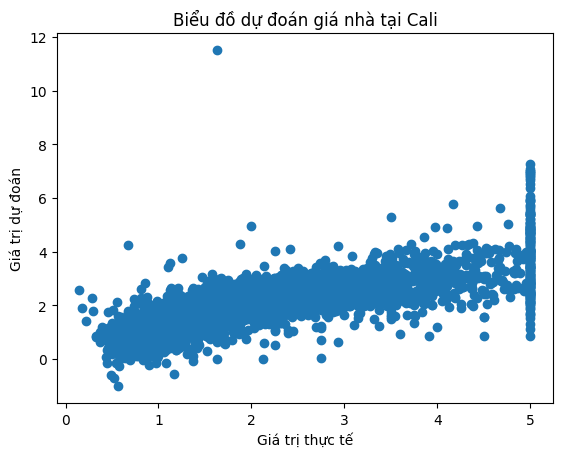

In [26]:
# Vẽ biểu đồ
plt.scatter(y_test, y_pred)
plt.xlabel('Giá trị thực tế')
plt.ylabel('Giá trị dự đoán')
plt.title('Biểu đồ dự đoán giá nhà tại Cali')
plt.show

In [ ]:
# Hồi quy logistic
# Phân loại nhị phân hoặc đa lớp dựa trên các đặc trưng 

In [2]:
# Xây dựng mô hình LG để phân loại nhị phân trong dữ liệu breast Cancer
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [3]:
# load data
data = load_breast_cancer()
x=data.data
y=data.target

In [4]:
#Chia tập dữ liệu thành tập huấn luyện (75%) và tập kiểm tra
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42)


In [5]:
# Xây dựng và huấn luyện mô hình
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
model = LogisticRegression(max_iter=5000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=5000)

In [6]:
# Dự đoán và đánh giá mô hình 
y_pred = model.predict(x_test)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
[[53  1]
 [ 2 87]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        54
           1       0.99      0.98      0.98        89

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143


Accuracy Score: 0.9790209790209791


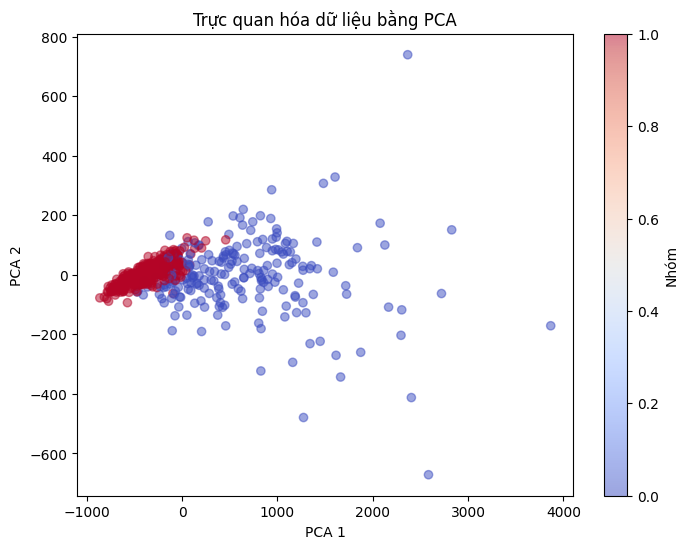

In [15]:
# Trực quan hóa dữ liệu 
import matplotlib.pyplot as plt 
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y, cmap='coolwarm', alpha=0.5)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Trực quan hóa dữ liệu bằng PCA')
plt.colorbar(label="Nhóm")
plt.show()

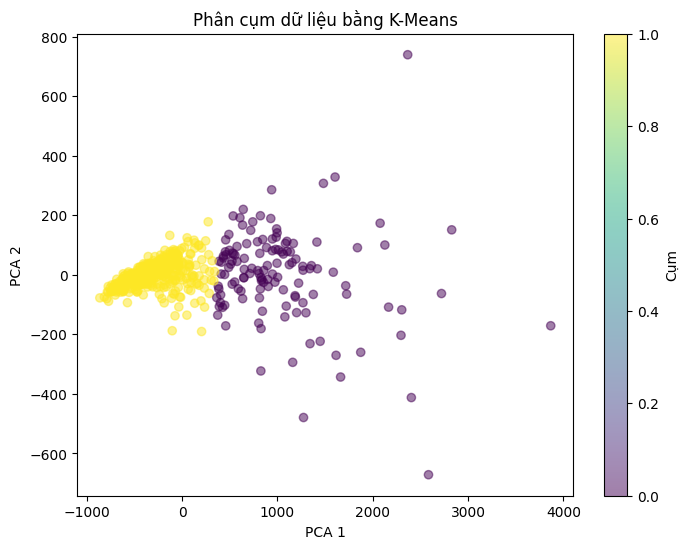

In [16]:
# Phân cụm
# Nhóm các đối tượng có đặc điểm tương đồng mà không cần gán nhãn 
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters = kmeans.fit_predict(x)
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Phân cụm dữ liệu bằng K-Means')
plt.colorbar(label="Cụm")
plt.show()

In [17]:
# Sử dụng data Iris để phân cụm
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 

In [18]:
iris=datasets.load_iris()
x=iris.data # có 4 đặc trưng
y=iris.target # nhãn để so sánh

In [19]:
# Áp dụng kMean với cụm số là 3
kmeans=KMeans(n_clusters=3, random_state=42)
kmeans.fit(x)
y_Kmeans=kmeans.predict(x)

In [20]:
# Sử dụng PCA để giảm chiều (về nhà giải thích ở bài tập về nhà)
pca= PCA(n_components=2) # Giảm xuống còn 2 chiều
x_pca=pca.fit_transform(x)

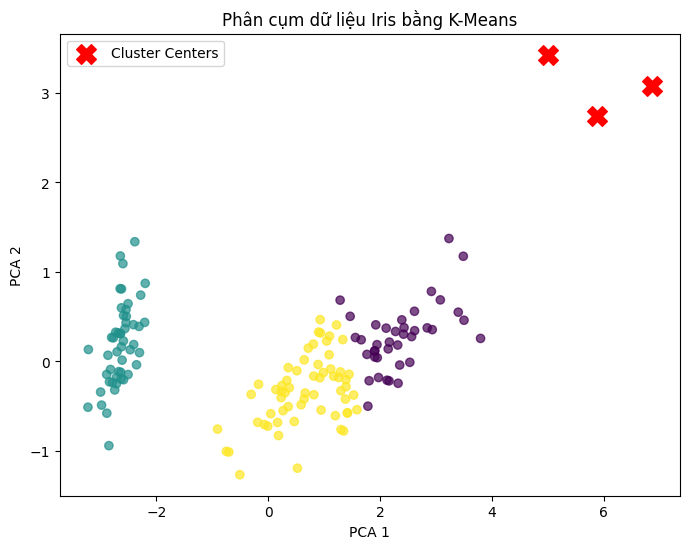

In [ ]:
# Trực quan hóa kết quả 
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y_Kmeans, cmap='viridis', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', marker='X', s=200, label='Cluster Centers') 
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Phân cụm dữ liệu Iris bằng K-Means')
plt.legend()
plt.show()

In [ ]:
# BTVH:
# 1. Cho tập dữ liệu bệnh tim bằng hồi quy logistic
# 2. Ứng dụng thuật toán Kmean cho tập dữ liệu customer data, you can get in kanggle 
# 3. Tìm hiểu về ma trận nhầm lẫn và đánh giá độ chính xác trên các bài tập lớn

In [ ]:
# Bài 1:
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
df = pd.read_csv("D:\MaiThienHuong-2274802010352\Số hóa và tt số\Lab 4/framingham.csv") 
df=df.dropna()
X = df.drop("TenYearCHD", axis=1)
y = df["TenYearCHD"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)



Confusion Matrix:
[[602   8]
 [112  10]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       610
           1       0.56      0.08      0.14       122

    accuracy                           0.84       732
   macro avg       0.70      0.53      0.53       732
weighted avg       0.80      0.84      0.78       732


Accuracy Score: 0.8360655737704918


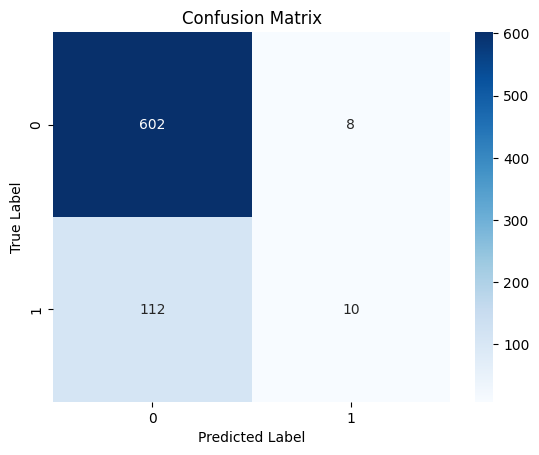

In [ ]:
# Đánh giá độ chính xác
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

# Ma trận nhầm lẫn
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Thông tin dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

Mô tả dữ liệu:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.75000

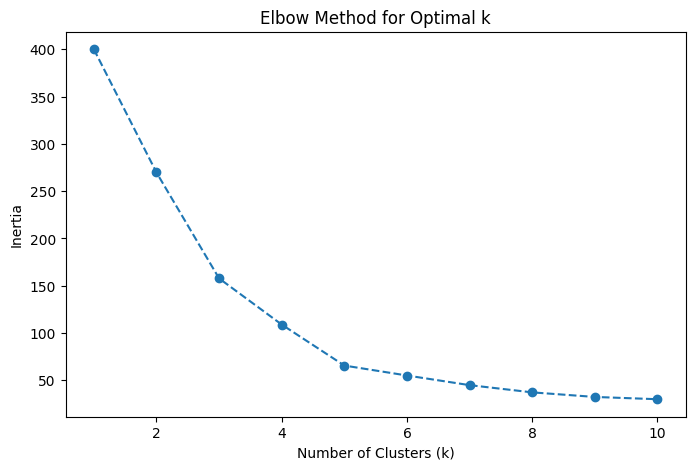

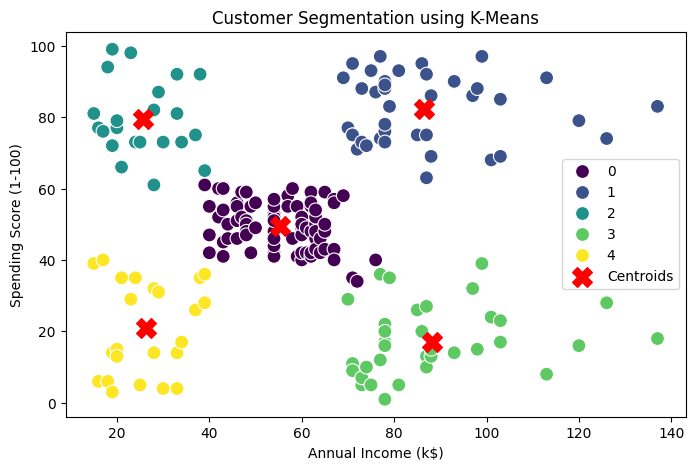

In [19]:
# Bài 2:
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
df = pd.read_csv("D:\MaiThienHuong-2274802010352\Số hóa và tt số\Lab 4/Mall_Customers.csv")
print("Thông tin dữ liệu:")
print(df.info())
print("\nMô tả dữ liệu:")
print(df.describe())
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker="o", linestyle="--")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], 
                hue=df["Cluster"], palette="viridis", s=100)
plt.scatter(kmeans.cluster_centers_[:, 0] * scaler.scale_[0] + scaler.mean_[0], 
            kmeans.cluster_centers_[:, 1] * scaler.scale_[1] + scaler.mean_[1], 
            s=200, c="red", label="Centroids", marker="X")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segmentation using K-Means")
plt.legend()
plt.show()
